# Portuguese banking institution marketing campaign

# 1)  Importing Libraries and Data

In [174]:
# Import Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import random
# Ignore warnings
import warnings
warnings.filterwarnings('ignore');

# 2) Import the data into a Pandas DataFrame

In [175]:
bankfull = "Resources/bank-full.csv"

# Import the data into a Pandas DataFrame
df = pd.read_csv(bankfull)
df.head(25)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


# 3) Exploratory Data Analysis
# Datatypes of each column and the shape of the dataset

In [176]:
#3-a) Shape of Data
df.shape

(45211, 17)

In [177]:
#3-b) Data Types
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [178]:
# Schematic representation of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [179]:
#3-c)  Check for null values - Missing Values
print ("\nNull Values :  ", df.isnull().sum().values.sum())


Null Values :   0


In [180]:
df.replace('unknown',np.NaN,inplace=True)

In [181]:
#3-d) 5 Point Summary of Numerical attributes
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [182]:
df.groupby("Target").agg({'Target': 'count'})

,Target
Target,
no,39922
yes,5289


# Correlation Matrix / Outliers Identification
Correlation matrix can reveal features that have no correlation and we can remove them

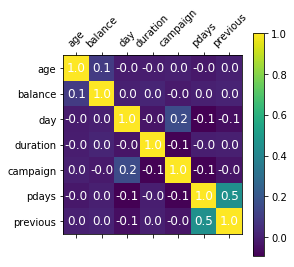

In [183]:

plt.matshow(df.corr())
plt.colorbar()
plt.xticks(np.arange(len(df.corr().columns)), df.corr().columns.values, rotation = 45) 
plt.yticks(np.arange(len(df.corr().columns)), df.corr().columns.values) 
for (i, j), corr in np.ndenumerate(df.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=12)

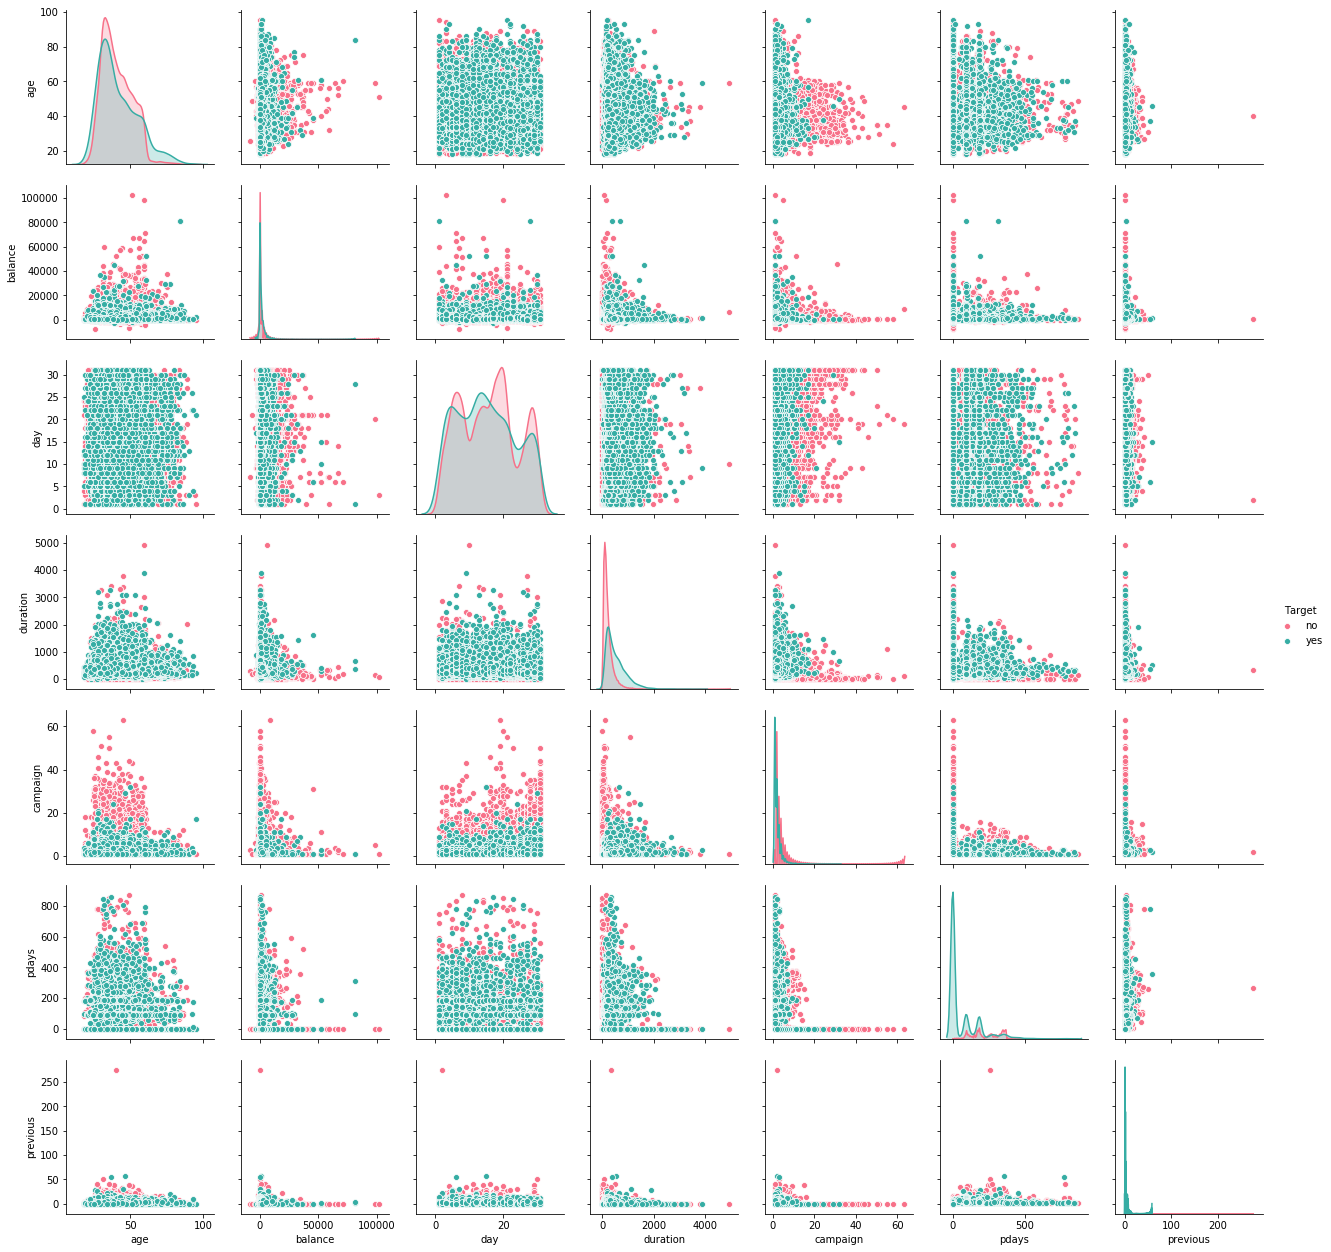

In [184]:
import seaborn as sns
sns.pairplot(df, hue="Target", palette="husl")

# Data vizualization

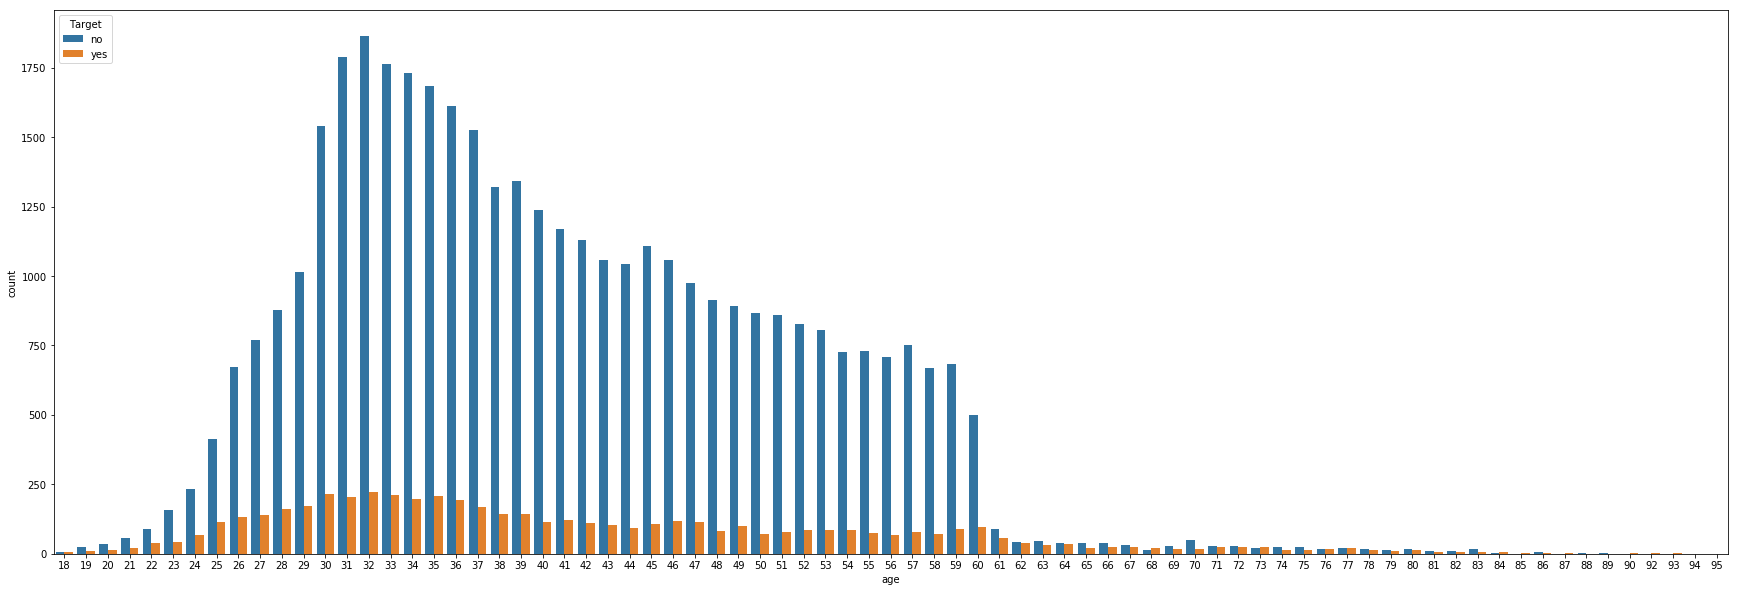

In [185]:

df['age'].value_counts()
f, ax = plt.subplots(figsize=(30, 10))
sns.countplot(x = 'age', hue = 'Target', data = df)

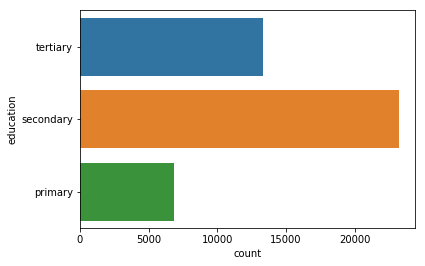

In [186]:
sns.countplot(y='education', data=df)


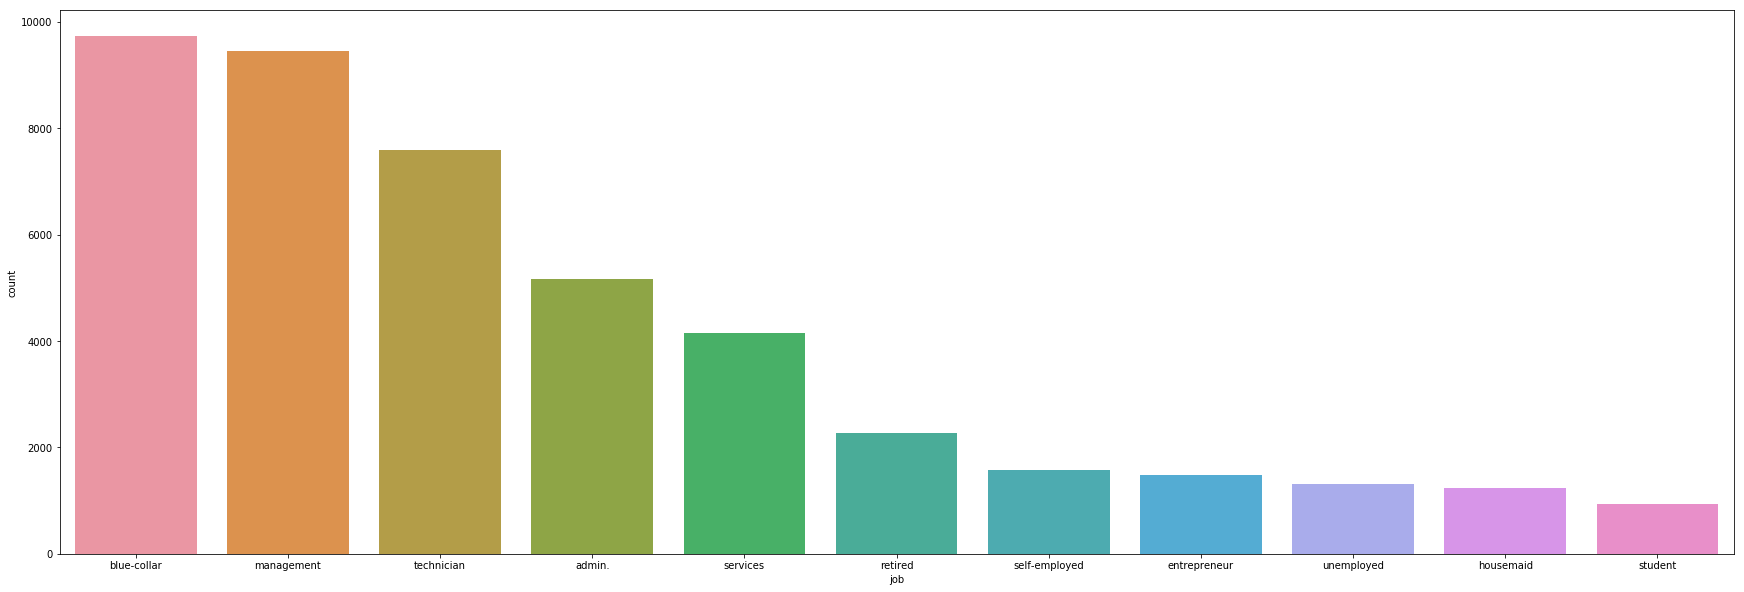

In [187]:
result = df.groupby(["job"]).count().reset_index().sort_values('Target',ascending=False)
f, ax = plt.subplots(figsize=(30, 10))
sns.countplot(df['job'],order=result['job'])

# Encoding Categorical Variables

In [188]:

# use the get_dummies method of pandas to get separate columns for each feature based on the unqiue values in the dataset.
# Re-cast categorical columns using one-hot encoding
df1 = pd.get_dummies(df, columns=['job',
                                  'education',
                                  'marital',
                                  'default',
                                  'housing',
                                  'loan',
                                  'contact',
                                 'month',
                                 'poutcome'])
df1.head()

,age,balance,day,duration,campaign,pdays,previous,Target,job_admin.,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,58,2143,5,261,1,-1,0,no,0,0,...,0,0,0,1,0,0,0,0,0,0
1,44,29,5,151,1,-1,0,no,0,0,...,0,0,0,1,0,0,0,0,0,0
2,33,2,5,76,1,-1,0,no,0,0,...,0,0,0,1,0,0,0,0,0,0
3,47,1506,5,92,1,-1,0,no,0,1,...,0,0,0,1,0,0,0,0,0,0
4,33,1,5,198,1,-1,0,no,0,0,...,0,0,0,1,0,0,0,0,0,0


# Applying Machine Learning

# 4) Training and Test set Split

In [189]:

y = df1['Target']
X = df1.drop(['Target'], axis = 1)
X = pd.get_dummies(X)    
print("Total features: {}".format(X.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

Total features: 47


# 5) Classification Algorithms


# LogisticRegression Algorithms

In [190]:

from sklearn.linear_model import LogisticRegression
# Fit the model
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

In [191]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          no       0.92      0.97      0.94     11969
         yes       0.63      0.35      0.45      1595

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.77      0.66      0.70     13564
weighted avg       0.88      0.90      0.89     13564



# Confusion matrix

In [192]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,predictions)

array([[11639,   330],
       [ 1038,   557]], dtype=int64)

Text(33.0, 0.5, 'Actual classes')

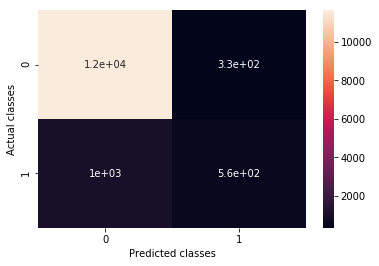

In [193]:
# Plot of the confussion matrix
cfm = confusion_matrix(y_test,predictions)
sns.heatmap(cfm, annot=True)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

In [194]:
# Accuracy score
from sklearn.metrics import accuracy_score

print('Logistic Regression accuracy score is: {0:0.4f}'. format(accuracy_score(y_test,predictions )))

Logistic Regression accuracy score is: 0.8991


# 6) Ensemble Models and Comparison

# DecisionTreeClassifier Algorithm

In [195]:

# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [196]:
# Fit the decision tree with default hyperparameters, apart from max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [197]:
y_pred_default = dt_default.predict(X_test)
print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94     11969
         yes       0.63      0.31      0.42      1595

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.77      0.65      0.68     13564
weighted avg       0.88      0.90      0.88     13564



In [198]:
print('DecisionTreeClassifier accuracy score is: {0:0.5f}'. format(accuracy_score(y_test,predictions )))

DecisionTreeClassifier accuracy score is: 0.89914


# RandomForestClassifier Algorithm

In [199]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [200]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [201]:
predict = rfc.predict(X_test)
accuracy_score(y_test, predict)
print('RandomForestClassifier accuracy score is: {0:0.5f}'. format(accuracy_score(y_test,predictions )))

RandomForestClassifier accuracy score is: 0.89914


# BaggingClassifier Algorithm

In [202]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(X_train, y_train)

In [203]:
test_pred = bgcl.predict(X_train)

accuracy_score(y_test, predict)
print('BaggingClassifier accuracy score is: {0:0.3f}'. format(accuracy_score(y_test,predictions )))


BaggingClassifier accuracy score is: 0.899


# GradientBoost Classifier Algorithm

In [204]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(X_train, y_train)

In [205]:
test_pred = gbcl.predict(X_train)
accuracy_score(y_test, predict)
print('GradientBoostingClassifier accuracy score is: {0:0.4f}'. format(accuracy_score(y_test,predictions )))


GradientBoostingClassifier accuracy score is: 0.8991


# 7) Comparison/Analyzing Results

In [206]:

classifiers = [DecisionTreeClassifier(),LogisticRegression(),
               GradientBoostingClassifier(),BaggingClassifier(),RandomForestClassifier(),]
classifier_names = ["LogisticRegression","Decision Tree Classifier", "RandomForestClassifier","BaggingClassifier",
                    "GradientBoostingClassifier"]

accuracies = []

In [207]:
from sklearn.metrics import accuracy_score

for i in range(len(classifiers)):
    classifier = classifiers[i]
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("{}:".format(classifier_names[i]))
    print(" Accuracy_score: {:.2f}".format(accuracy_score(y_test, y_pred)))
    accuracy = accuracy_score(y_test, y_pred)*100
    accuracies.append(accuracy)

LogisticRegression:
 Accuracy_score: 0.88
Decision Tree Classifier:
 Accuracy_score: 0.90
RandomForestClassifier:
 Accuracy_score: 0.90
BaggingClassifier:
 Accuracy_score: 0.90
GradientBoostingClassifier:
 Accuracy_score: 0.90


# Conclusion

We have built a base model ( Logistic regression) and compared it with ensemble models. When compared with Logistic Regression(0.8991) ,we find that the other models developed using Decision Tree classifier, Random Forest Classifier, Bagging Classifier and Gradient Boosting Classifier is having a better accuracy score of 0.90.  